In [385]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

df = scipy.io.loadmat('Dataset1.mat')

In [386]:
#functions

def averager(dataset):
    
    averaged=[]

    for i in range(len(dataset)):
        averaged.append(np.mean(dataset[i,:]))
    return averaged

In [387]:
df.values()

dict_values([b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 15 20:14:36 2014', '1.0', [], array([[3],
       [5],
       [5],
       [2],
       [6],
       [3],
       [7],
       [4],
       [3],
       [4],
       [2],
       [1],
       [8],
       [5],
       [4],
       [2],
       [4],
       [7],
       [5],
       [2],
       [5],
       [1],
       [5],
       [4],
       [3],
       [6],
       [8],
       [1],
       [1],
       [3],
       [5],
       [7],
       [4],
       [1],
       [3],
       [7],
       [8],
       [5],
       [5],
       [2],
       [3],
       [7],
       [1],
       [8],
       [5],
       [3],
       [7],
       [4],
       [2],
       [5],
       [8],
       [8],
       [5],
       [7],
       [7],
       [4],
       [2],
       [6],
       [4],
       [6],
       [6],
       [5],
       [4],
       [3],
       [5],
       [6],
       [7],
       [8],
       [3],
       [4],
       [1],
       [8],
       [5],
       [3],
       

In [388]:
direction=df["direction"]
direction

array([[3],
       [5],
       [5],
       [2],
       [6],
       [3],
       [7],
       [4],
       [3],
       [4],
       [2],
       [1],
       [8],
       [5],
       [4],
       [2],
       [4],
       [7],
       [5],
       [2],
       [5],
       [1],
       [5],
       [4],
       [3],
       [6],
       [8],
       [1],
       [1],
       [3],
       [5],
       [7],
       [4],
       [1],
       [3],
       [7],
       [8],
       [5],
       [5],
       [2],
       [3],
       [7],
       [1],
       [8],
       [5],
       [3],
       [7],
       [4],
       [2],
       [5],
       [8],
       [8],
       [5],
       [7],
       [7],
       [4],
       [2],
       [6],
       [4],
       [6],
       [6],
       [5],
       [4],
       [3],
       [5],
       [6],
       [7],
       [8],
       [3],
       [4],
       [1],
       [8],
       [5],
       [3],
       [3],
       [1],
       [5],
       [6],
       [6],
       [3],
       [7],
       [3],
       [1],
    

In [389]:
df=df["R"]

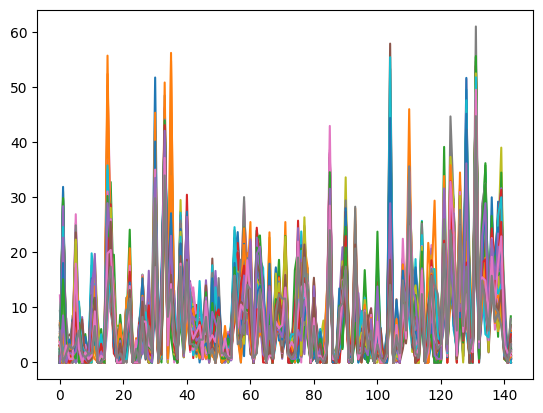

In [390]:
plt.plot(df)

158


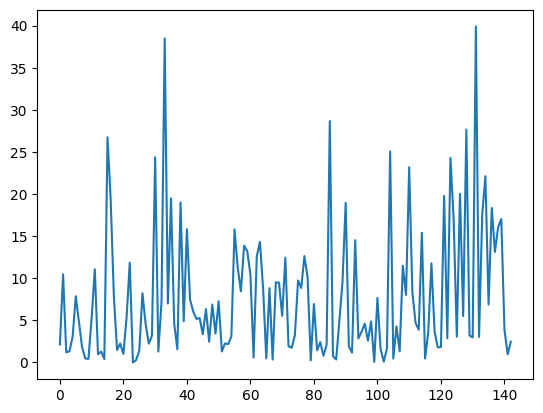

In [392]:
def averager(dataset):
    
    averaged=[]

    for i in range(len(dataset)):
        averaged.append(np.mean(dataset[i,:]))
    return averaged
averager(df)
plt.plot(averager(df))
print(len(df[0]))

In [393]:
df=df.T


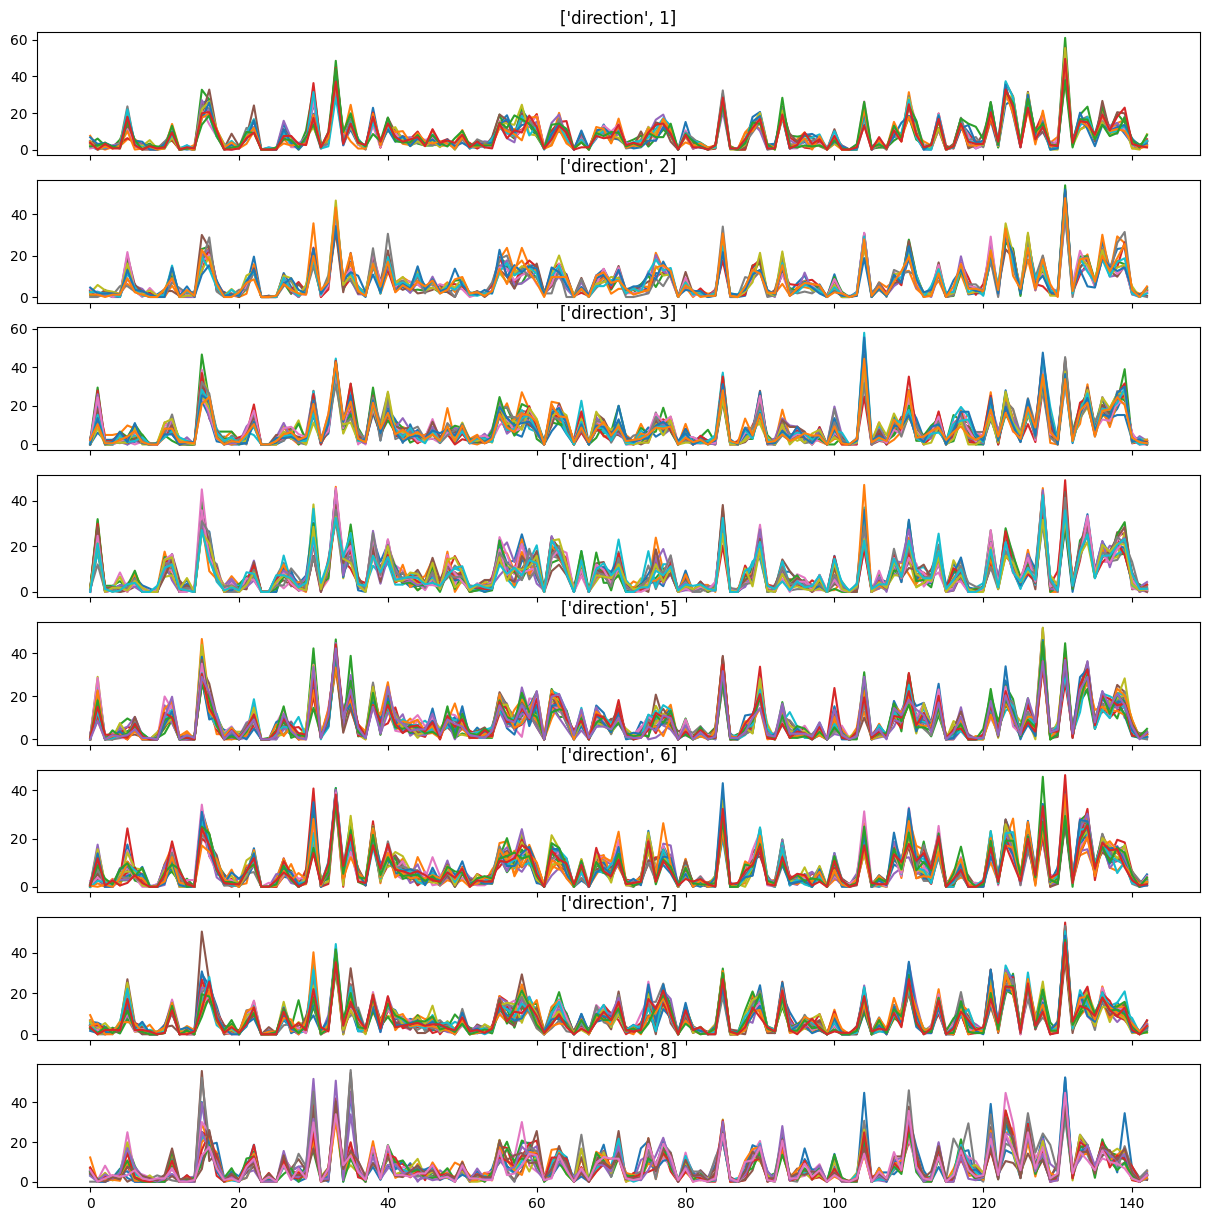

In [394]:
def show_only1_dir(direct=1,direction=direction,df=df):   
    only1=[]
    for i in range(len(direction)):
        if direction[i]==direct:
            only1.append(df[i])
    return np.array(only1)
 
fig, ax = plt.subplots(8, sharex='col', sharey='row',figsize=(15, 15))
for i in range(0,8):
    
        ax[i].plot(show_only1_dir(i+1).T)
        ax[i].set_title(label=["direction",i+1])



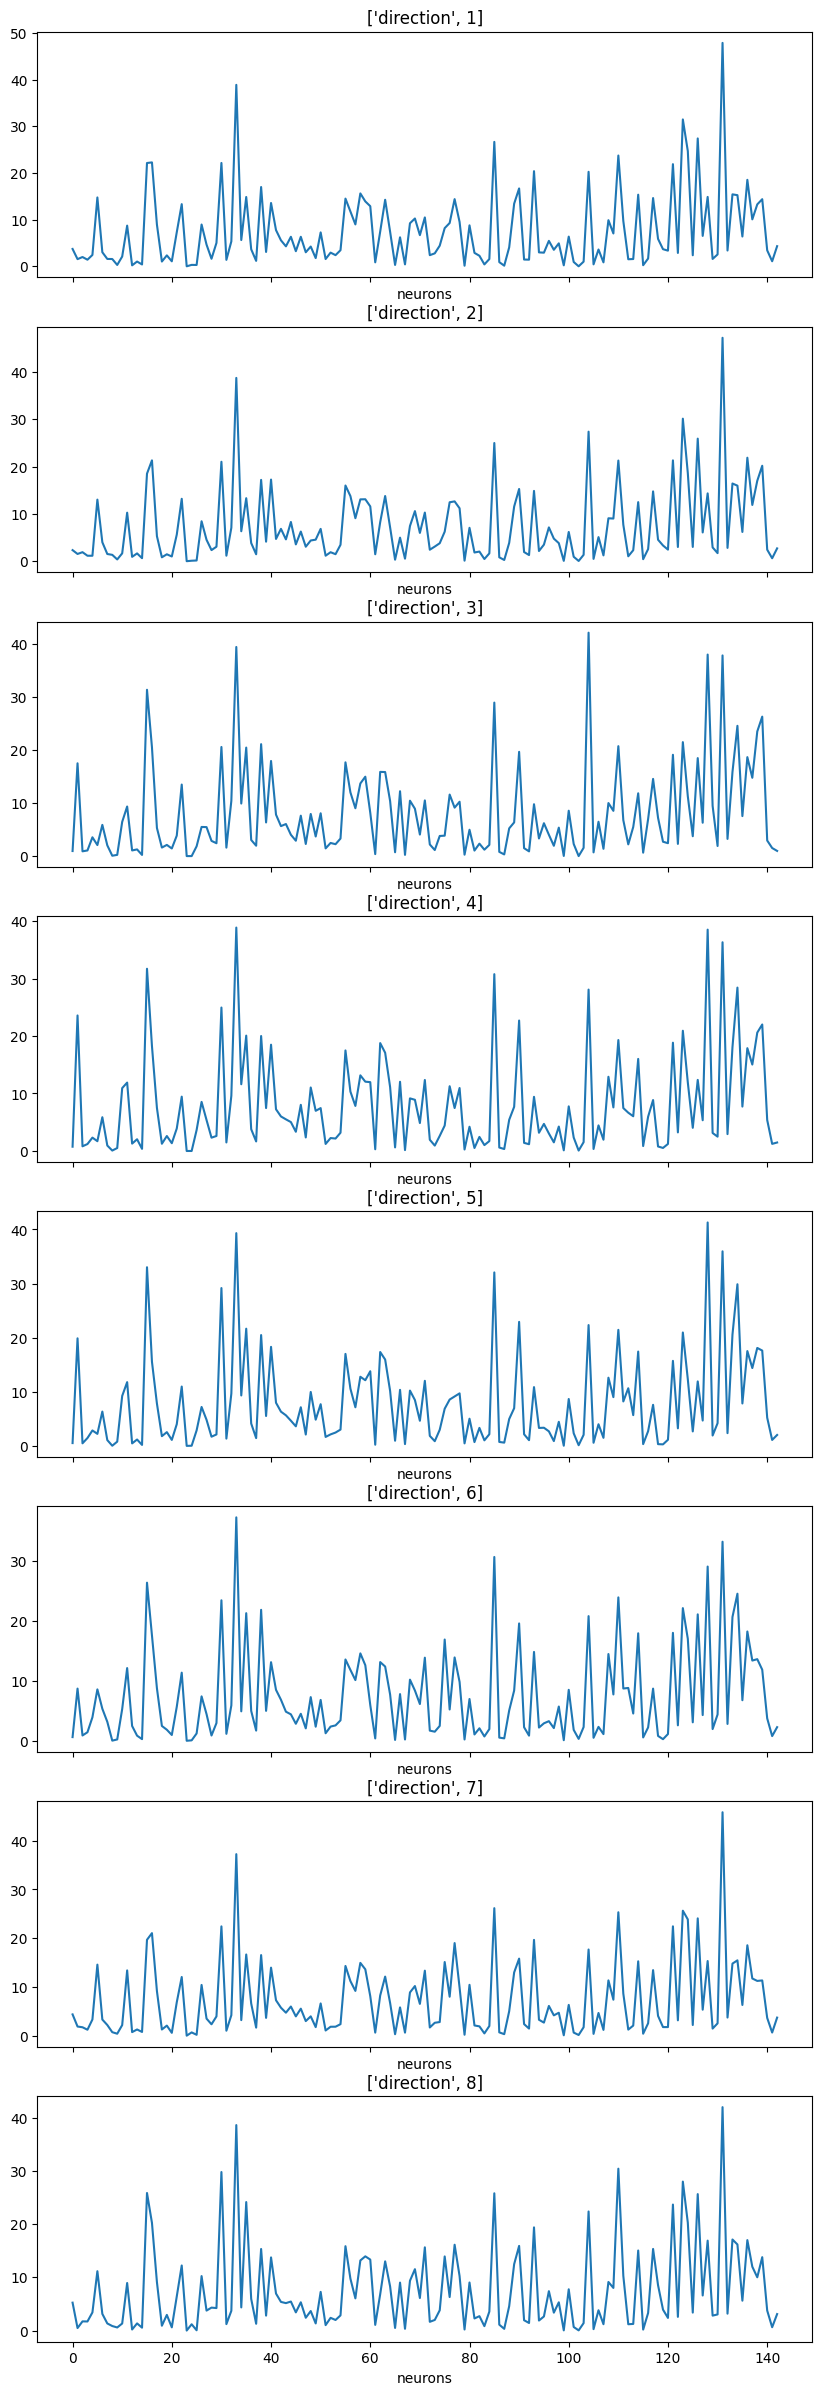

In [395]:
fig, ax = plt.subplots(8, sharex='col', sharey='row',figsize=(10, 30))
for i in range(0,8):
    
        ax[i].plot(averager(show_only1_dir(i+1).T))
        ax[i].set_title(label=["direction",i+1])
        ax[i].set_xlabel("neurons")



In [384]:
def filtering(direc,neuron):
    for i in range(len(neuron)):
        if direc==direction[i]:
            return True
        else: False
print(list(filter(filtering(direc=1,neuron=df[0]),df[0])))
            

TypeError: 'bool' object is not callable